In this notebook, we investigate the effects of precipitation on volcanic eruptions in the Galapagos. We use satellite precipitation data that ranges between June 6, 2000 through April 30, 2023. 12 eruptions occur in this period-- 5 at Fernandina, 2 at Cerro Azul, 3 at Sierra Negra, and 2 at Wolf. 

In [94]:
# Import necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
from matplotlib import cm
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator

In [2]:
# Create path to data
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))

In [4]:
# Function used to convert date strings into floats
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

We look at 90 day rolling averages of rainfall at each volcano site. We group dates at each volcano into tertiles based on the 90 day rolling rain averages. In gray, we've included the cumulative precipitation.

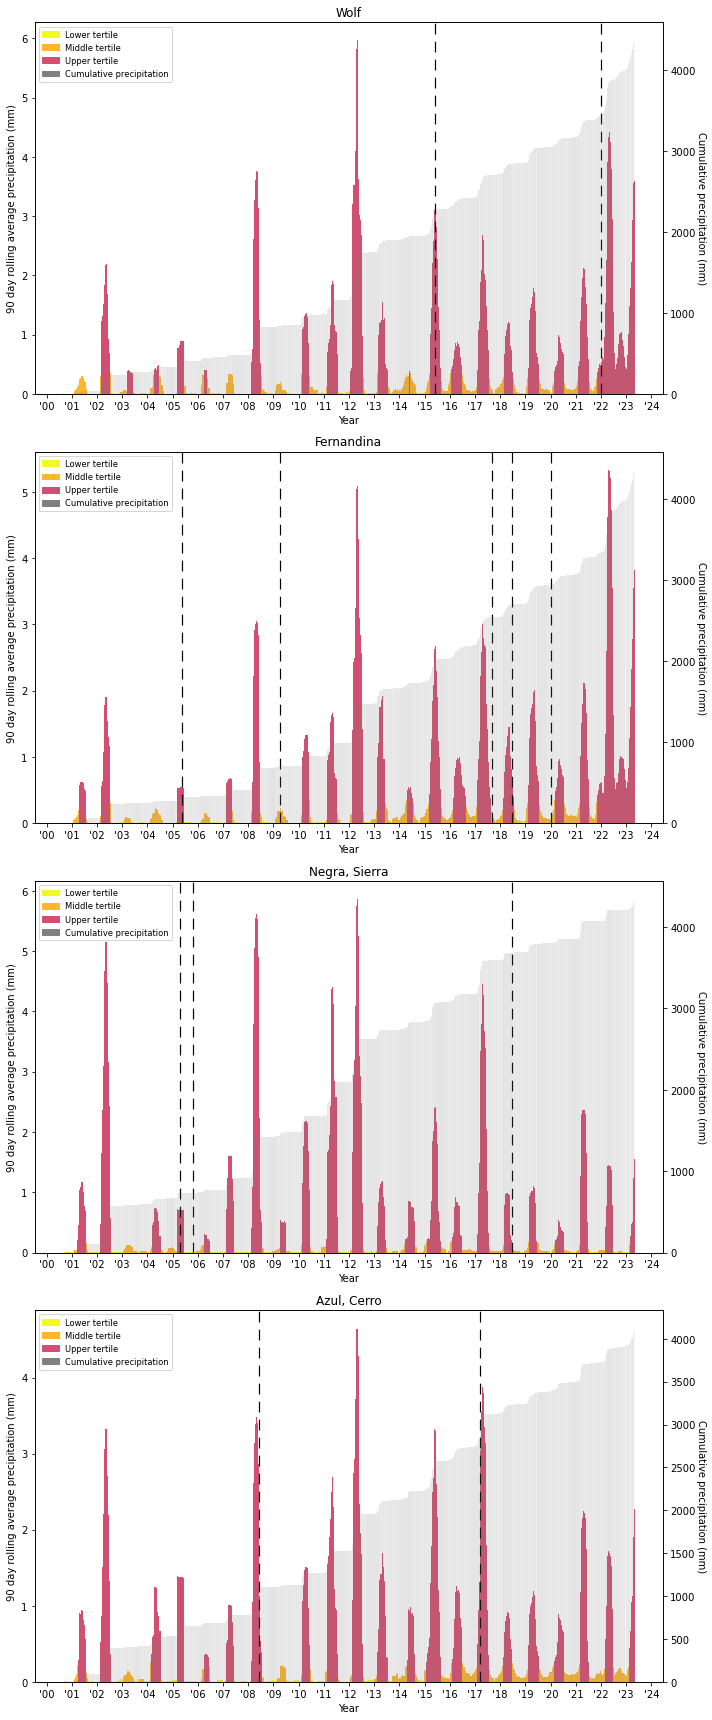

In [125]:
#Plot all volcanos
volcanos = {'Wolf': (-91.35, .05), 'Fernandina': (-91.55, -.35), 'Negra, Sierra': (-91.15, -.85), 'Azul, Cerro': (-91.35, -.95) }
fig, axes = plt.subplots(4, 1, figsize=(10, 24))
count = 0
plasma_colormap = cm.get_cmap('plasma', num_colors)

color1_rgb = plasma_colormap(255)[:3]  # RGB for the first color
color2_rgb = plasma_colormap(215)[:3]  # RGB for a color in the middle
color3_rgb = plasma_colormap(135)[:3] 
colors = [color1_rgb, color2_rgb, color3_rgb]

for pick in volcanos:

    erupt_dates = np.array(eruptions['Decimal'][(eruptions['Volcano'] == pick) & (eruptions['Start'] >= '2000')])
    rolling_galapagos = rainfall[(rainfall['Longitude'] == volcanos[pick][0]) & (rainfall['Latitude'] == volcanos[pick][1])].copy()
    rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)
    rolling_galapagos = rolling_galapagos.sort_values(by=['Decimal'])
    rolling_galapagos['roll90'] = rolling_galapagos.Precipitation.rolling(90).mean()
    rolling_galapagos = rolling_galapagos.dropna()
    rolling_galapagos['cumsum'] = rolling_galapagos.Precipitation.cumsum()

    dates = rolling_galapagos.sort_values(by=['roll90'])
    date_dec = np.array(dates['Decimal'])
    date_rain = np.array(dates['roll90'])
    log_rain = np.log(date_rain + 1) / np.log(1000000)
    bin_size = len(dates) // 3
    for l in range(3):
        axes[count].bar(date_dec[l*(bin_size): (l+1)*bin_size], date_rain[l*(bin_size): (l+1)*bin_size], color =colors[l], width = 0.01, alpha = 1)
    ax2 = axes[count].twinx()
    ax2.bar(rolling_galapagos.Decimal, np.array(rolling_galapagos['cumsum']), color ='gray', width = 0.01, alpha = .05)
    ax2.set_ylabel("Cumulative precipitation (mm)", rotation=270, labelpad= 10)

    for line_x in erupt_dates:
        axes[count].axvline(x=line_x, color='black', linestyle= 'dashed', dashes= (9,6), linewidth = 1.2)


    axes[count].set_ylabel("90 day rolling average precipitation (mm)")
    axes[count].set_xlabel("Year")
 
    axes[count].set_title(str(pick))

    axes[count].set_xticks(ticks=[2000 + i for i in range(25)], labels=["'" + str(2000 + i)[-2:] for i in range(25)])

    legend_handles = [
    mpatches.Patch(color=colors[0], label='Lower tertile'),
    mpatches.Patch(color=colors[1], label='Middle tertile'),
    mpatches.Patch(color=colors[2], label='Upper tertile'),
    mpatches.Patch(color='gray', label='Cumulative precipitation')]
    axes[count].legend(handles=legend_handles, loc='upper left', fontsize='small')
    count += 1
# Data plot
plt.tight_layout()
plt.show()


Below, we plot the 90 day rolling average precipitation data on a logarithmic scale.

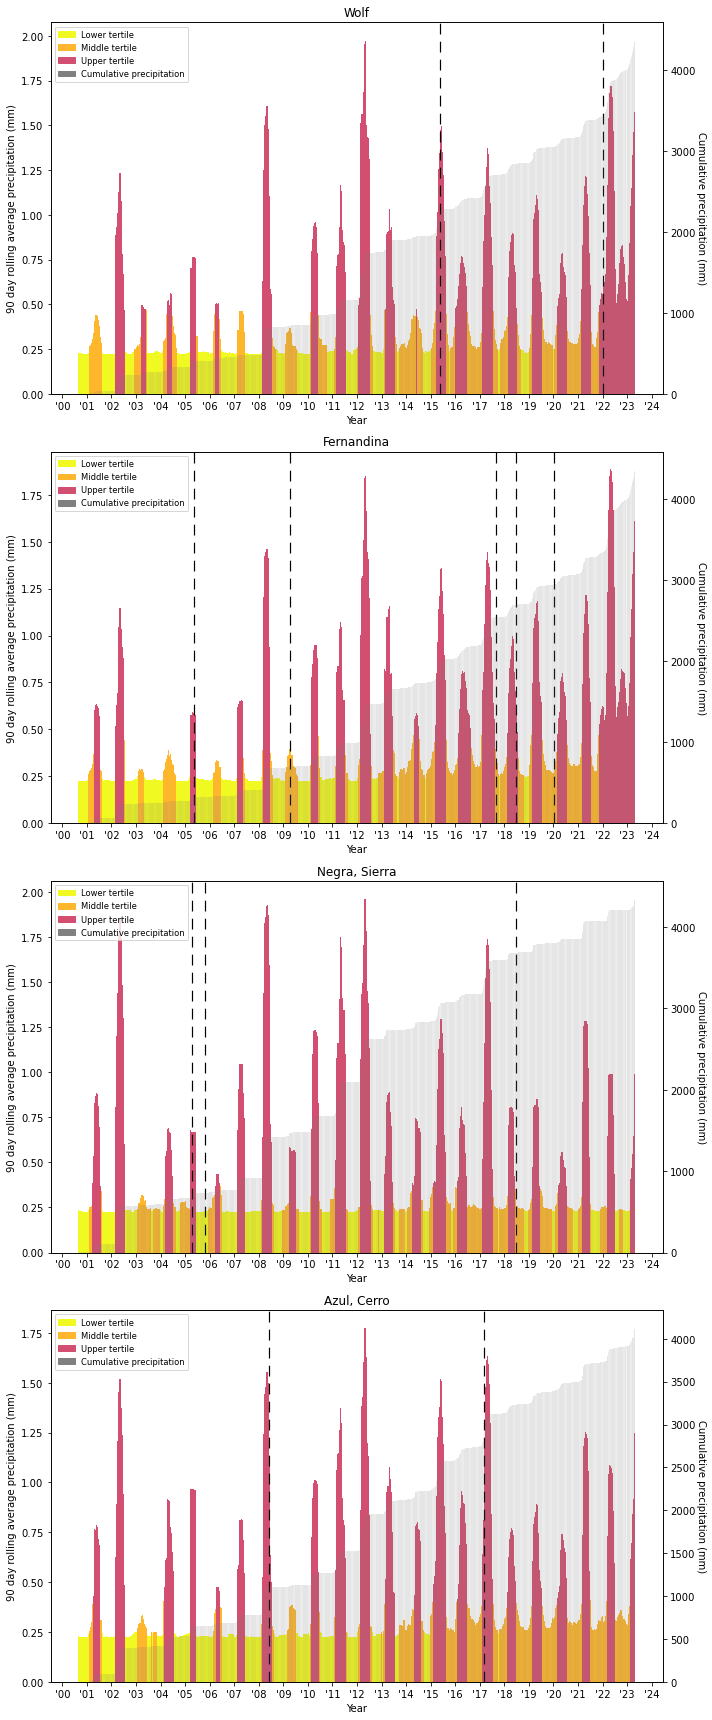

In [127]:
#Plot all volcanos
volcanos = {'Wolf': (-91.35, .05), 'Fernandina': (-91.55, -.35), 'Negra, Sierra': (-91.15, -.85), 'Azul, Cerro': (-91.35, -.95) }
fig, axes = plt.subplots(4, 1, figsize=(10, 24))
count = 0
plasma_colormap = cm.get_cmap('plasma', num_colors)

color1_rgb = plasma_colormap(255)[:3]  # RGB for the first color
color2_rgb = plasma_colormap(215)[:3]  # RGB for a color in the middle
color3_rgb = plasma_colormap(135)[:3] 
colors = [color1_rgb, color2_rgb, color3_rgb]

for pick in volcanos:

    erupt_dates = np.array(eruptions['Decimal'][(eruptions['Volcano'] == pick) & (eruptions['Start'] >= '2000')])
    rolling_galapagos = rainfall[(rainfall['Longitude'] == volcanos[pick][0]) & (rainfall['Latitude'] == volcanos[pick][1])].copy()
    rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)
    rolling_galapagos = rolling_galapagos.sort_values(by=['Decimal'])
    rolling_galapagos['roll90'] = rolling_galapagos.Precipitation.rolling(90).mean()
    rolling_galapagos = rolling_galapagos.dropna()
    rolling_galapagos['cumsum'] = rolling_galapagos.Precipitation.cumsum()

    dates = rolling_galapagos.sort_values(by=['roll90'])
    date_dec = np.array(dates['Decimal'])
    date_rain = np.array(dates['roll90'])
    log_rain = np.log(date_rain + 1.25)
    bin_size = len(dates) // 3
    for l in range(3):
        axes[count].bar(date_dec[l*(bin_size): (l+1)*bin_size], log_rain[l*(bin_size): (l+1)*bin_size], color =colors[l], width = 0.01, alpha = 1)
    ax2 = axes[count].twinx()
    ax2.bar(rolling_galapagos.Decimal, np.array(rolling_galapagos['cumsum']), color ='gray', width = 0.01, alpha = .05)
    ax2.set_ylabel("Cumulative precipitation (mm)", rotation=270, labelpad= 10)
    for line_x in erupt_dates:
        axes[count].axvline(x=line_x, color='black', linestyle= 'dashed', dashes= (9,6), linewidth = 1.2)


    axes[count].set_ylabel("90 day rolling average precipitation (mm)")
    axes[count].set_xlabel("Year")
 
    axes[count].set_title(str(pick))

    axes[count].set_xticks(ticks=[2000 + i for i in range(25)], labels=["'" + str(2000 + i)[-2:] for i in range(25)])

    legend_handles = [
    mpatches.Patch(color=colors[0], label='Lower tertile'),
    mpatches.Patch(color=colors[1], label='Middle tertile'),
    mpatches.Patch(color=colors[2], label='Upper tertile'),
    mpatches.Patch(color='gray', label='Cumulative precipitation')]
    axes[count].legend(handles=legend_handles, loc='upper left', fontsize='small')
    count += 1
# Data plot
plt.tight_layout()
plt.show()


Below we break up eruptions into lower, middle, and upper precipitation tertiles, first by individual volcano, and then all together.

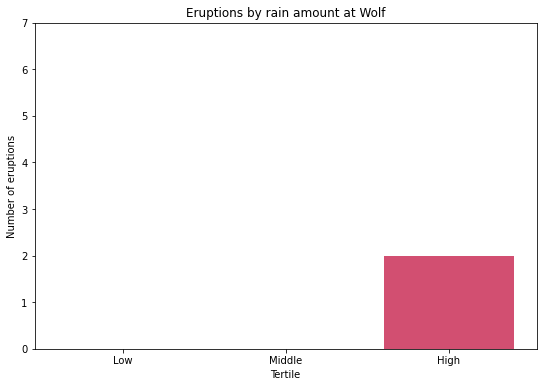

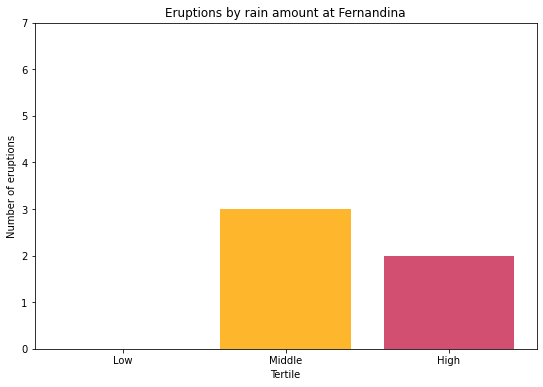

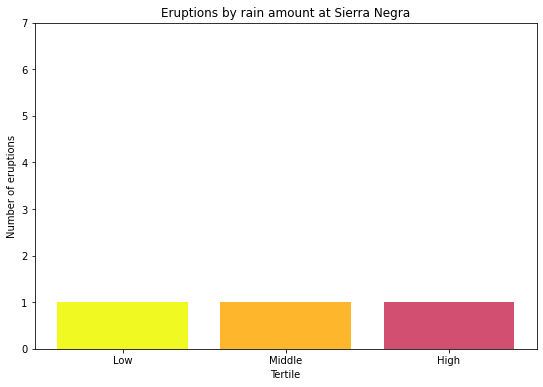

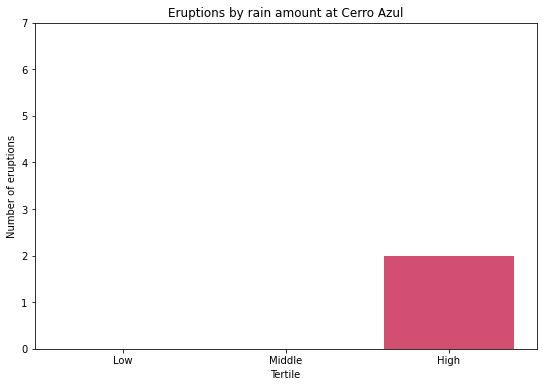

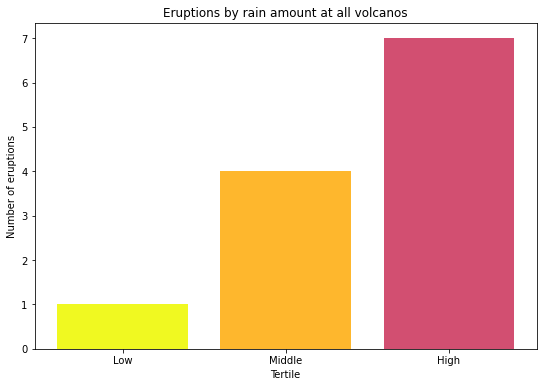

In [128]:
# Volcano longitude and latitudes are recorded in a dictionary. "Picks" is the list of volcanos whose eruptions will be considered.
volcanos = {'Wolf': (-91.35, .05), 'Fernandina': (-91.55, -.35), 'Negra, Sierra': (-91.15, -.85), 'Azul, Cerro': (-91.35, -.95) }
picks = [['Wolf'], ['Fernandina'], ['Negra, Sierra'], ['Azul, Cerro'], ['Fernandina', 'Azul, Cerro', 'Negra, Sierra', 'Wolf']] #choose volcano(s)
titles = ['Wolf', 'Fernandina', 'Sierra Negra', 'Cerro Azul', 'all volcanos']

categories = ['Low', 'Middle', 'High']

num_colors = 256
plasma_colormap = cm.get_cmap('plasma', num_colors)

color1_rgb = plasma_colormap(255)[:3]  # RGB for the first color
color2_rgb = plasma_colormap(215)[:3]  # RGB for a color in the middle
color3_rgb = plasma_colormap(135)[:3]  # RGB for the last color

for j in range(len(picks)):
    plt.figure(figsize=(9,6))
    values = [0,0,0]
    for i in picks[j]:
        erupt_dates = np.array(eruptions['Start'][(eruptions['Volcano'] == i) & (eruptions['Start'] >= '2000')])
        rolling_rain = rainfall[(rainfall['Longitude'] == volcanos[i][0]) & (rainfall['Latitude'] == volcanos[i][1])].copy()
        rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
        rolling_rain = rolling_rain.dropna()    
        all_rain = list(rolling_rain.sort_values(by=['roll90'])['Date'])
        third = len(all_rain) // 3
        for l in erupt_dates:
            values[all_rain.index(l) // third] += 1  
        
    plt.bar(categories, values, color=[color1_rgb, color2_rgb, color3_rgb])
    plt.xlabel("Tertile")
    plt.ylabel("Number of eruptions")
    plt.yticks([i for i in range(8)])
    plt.title("Eruptions by rain amount at " + titles[j])
    plt.show()

7 out of 12 eruptions (58.3%) occur in the top tertile. Further the 2009 eruption of Fernandina, which falls in the middle tertile, occurs during the rainiest period of that year.

Below, we plot rainfall at the volcano sites by year to demonstrate the seasonal nature of rainfall.

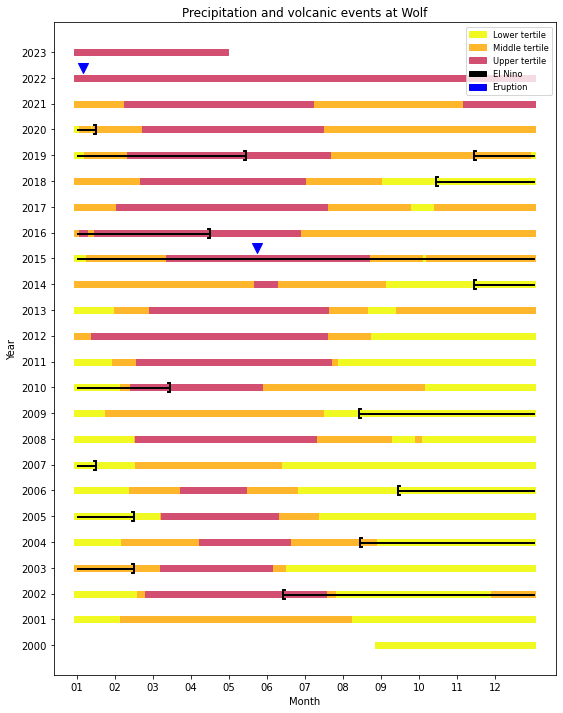

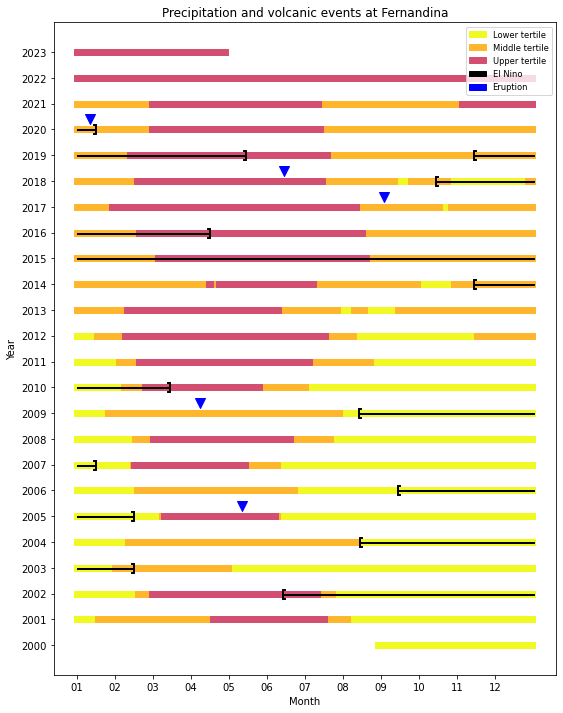

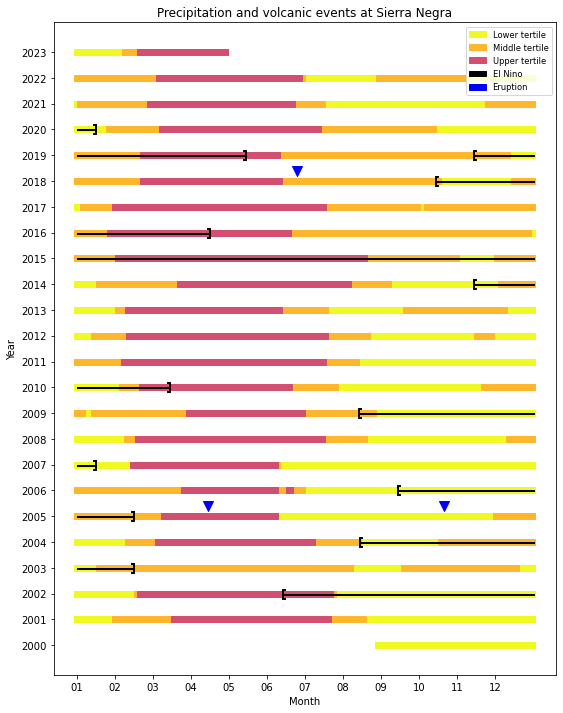

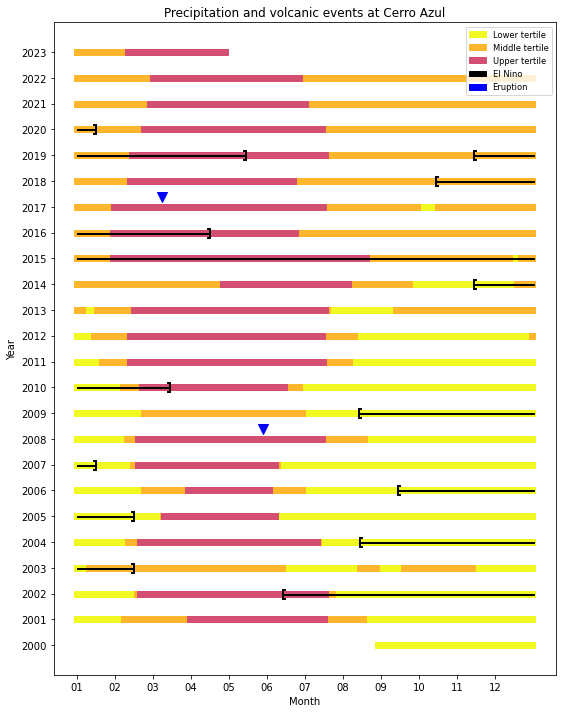

In [129]:
# Generates a plot of eruptions for each volcano listed in "picks", along with color coding of the top three quintiles of rainfall. 
volcanos = {'Wolf': (-91.35, .05, 'Wolf'), 'Fernandina': (-91.55, -.35, 'Fernandina'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Azul, Cerro': (-91.35, -.95, 'Cerro Azul')}
picks = ['Fernandina', 'Negra, Sierra', 'Azul, Cerro', 'Wolf']
elninos = [['2002-06-15', '2003-02-14'], ['2004-08-15', '2005-02-14'], ['2006-09-15', '2007-01-15'], ['2009-08-15', '2010-03-15'], ['2014-11-15', '2016-04-15'], ['2018-10-15', '2019-05-15'], ['2019-11-15', '2020-01-15']]
for i in elninos:
    i[0] = date_to_decimal_year(i[0])
    i[1] = date_to_decimal_year(i[1])
eruptions['Decimal'] = eruptions.Start.apply(date_to_decimal_year)

plasma_colormap = cm.get_cmap('plasma', num_colors)

color1_rgb = plasma_colormap(255)[:3]  # RGB for the first color
color2_rgb = plasma_colormap(215)[:3]  # RGB for a color in the middle
color3_rgb = plasma_colormap(135)[:3] 

for pick in volcanos:
    
    erupt_dates = np.array(eruptions['Decimal'][(eruptions['Volcano'] == pick) & (eruptions['Start'] >= '2000')])
    rolling_galapagos = rainfall[(rainfall['Longitude'] == volcanos[pick][0]) & (rainfall['Latitude'] == volcanos[pick][1])].copy()
    rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)
    rolling_galapagos = rolling_galapagos.sort_values(by=['Decimal'])
    rolling_galapagos['roll90'] = rolling_galapagos.Precipitation.rolling(90).mean()
    rolling_galapagos = rolling_galapagos.dropna()

    plt.figure(figsize=(9,12))

    volc_x = [((i) % 1) for i in erupt_dates]
    volc_y = [(i // 1) + .4 for i in erupt_dates]
    labels = list(eruptions['Volcano'][(eruptions['Start'] >= '2004-11-01') & (eruptions['Volcano'] == pick)])
    plt.scatter(volc_x, volc_y, color='blue', marker='v', s=100)

    dates = rolling_galapagos.sort_values(by=['roll90'])['Decimal']
    x = np.array((dates) % 1)
    y = np.array((dates) // 1)
    bin_size = len(x) // 3
    
    colors = [color1_rgb, color2_rgb, color3_rgb]
    for i in range(3):
        plt.scatter(x[i*bin_size:(i+1)*bin_size], y[i*bin_size:(i+1)*bin_size], color=colors[i], marker='s', s =30)
    legend_handles = [
    mpatches.Patch(color=colors[0], label='Lower tertile'),
    mpatches.Patch(color=colors[1], label='Middle tertile'),
    mpatches.Patch(color=colors[2], label='Upper tertile'),
    mpatches.Patch(color='black', label='El Nino'),
    mpatches.Patch(color='blue', label='Eruption')
]
    nino_x_starts = [((i[0]) % 1) for i in elninos]
    nino_y_starts = [(i[0] // 1) for i in elninos]
    nino_x_ends = [((i[1]) % 1) for i in elninos]
    nino_y_ends = [(i[1] // 1) for i in elninos]
    plt.scatter(nino_x_starts, nino_y_starts, color='black', marker='$[$', s=100)
    plt.scatter(nino_x_ends, nino_y_ends, color='black', marker='$]$', s=100)

    for i in elninos:
        vals = np.array([l for l in np.arange(i[0],i[1],.001)])
        plt.scatter(vals % 1, vals // 1, color='black', marker = 's', s = 1)

    plt.yticks([2000+k for k in range(24)], [str(2000+k) for k in range(24)])
    plt.xticks([(1/12)*k for k in range(12)], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
    plt.xlabel("Month") 
    plt.ylabel("Year") 
    plt.title('Precipitation and volcanic events at ' + volcanos[pick][2]) 
    plt.legend(handles=legend_handles, fontsize='small')
    plt.show() 